# Linear classification


In [1]:
import torch
import torch.nn as nn

In [2]:
import pandas as pd
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=n_samples,
                    noise=.03,
                    random_state=42)

circles = pd.DataFrame({
    'X1': X[:, 0]**2,
    'X2': X[:, 1]**2,
    'label': y
})
circles.head()

,X1,X2,label
0,0.568887,0.053583,1
1,0.571776,0.023488,1
2,0.664864,0.030027,1
3,0.155024,0.480087,1
4,0.195548,0.804113,0


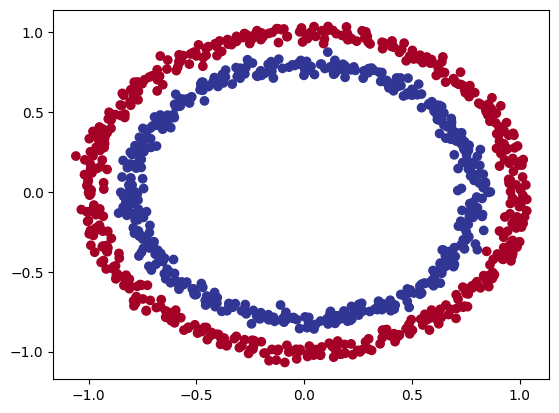

In [3]:
import matplotlib.pyplot as plt

plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [4]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [6]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [7]:
class CircleModelV0(nn.Module):
    def __init__(self) -> None:
        super().__init__()

        self.layer_1 = nn.Linear(in_features=2, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=1)

    def forward(self, x: torch.Tensor):
        return self.layer_2(self.layer_1(x))


model_0 = CircleModelV0()
model_0.to(device=device)

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [8]:
# Using sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

In [9]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(
    params=model_0.parameters(),
    lr=0.1
)

In [10]:
def accuracy_score(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    return (correct / len(y_pred)) * 100

In [11]:
# Let's see the output data:
y_logit = model_0(X_test.to(device))

In [12]:
y_pred_proba=torch.sigmoid(y_logit)
y_pred = torch.round(y_pred_proba)

print(accuracy_score(y_test.squeeze(), y_pred.squeeze()))


49.5


Training and testing


In [52]:
torch.manual_seed(42)
epochs = 100

for epoch in range(epochs):
    model_0.train()
    
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_score(y_train, y_pred)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    model_0.eval()
    with torch.inference_mode():
        y_test_logits = model_0(X_train).squeeze()
        y_test_pred = torch.round(torch.sigmoid(y_logits))
        
        test_loss = loss_fn(y_logits, y_train)
        test_acc = accuracy_score(y_train, y_pred)
    
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Acc: {acc} || Test loss: {test_loss} | Test acc: {test_acc}%")

Epoch: 0 | Loss: 0.6940141916275024 | Acc: 48.5 || Test loss: 0.6940141916275024 | Test acc: 48.5%
Epoch: 10 | Loss: 0.6940141916275024 | Acc: 48.5 || Test loss: 0.6940141916275024 | Test acc: 48.5%
Epoch: 20 | Loss: 0.6940141916275024 | Acc: 48.5 || Test loss: 0.6940141916275024 | Test acc: 48.5%
Epoch: 30 | Loss: 0.6940141916275024 | Acc: 48.5 || Test loss: 0.6940141916275024 | Test acc: 48.5%
Epoch: 40 | Loss: 0.6940141916275024 | Acc: 48.5 || Test loss: 0.6940141916275024 | Test acc: 48.5%
Epoch: 50 | Loss: 0.6940141916275024 | Acc: 48.5 || Test loss: 0.6940141916275024 | Test acc: 48.5%
Epoch: 60 | Loss: 0.6940141916275024 | Acc: 48.5 || Test loss: 0.6940141916275024 | Test acc: 48.5%
Epoch: 70 | Loss: 0.6940141916275024 | Acc: 48.5 || Test loss: 0.6940141916275024 | Test acc: 48.5%
Epoch: 80 | Loss: 0.6940141916275024 | Acc: 48.5 || Test loss: 0.6940141916275024 | Test acc: 48.5%
Epoch: 90 | Loss: 0.6940141916275024 | Acc: 48.5 || Test loss: 0.6940141916275024 | Test acc: 48.5%


# Step 2: ReLu activation function


In [15]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

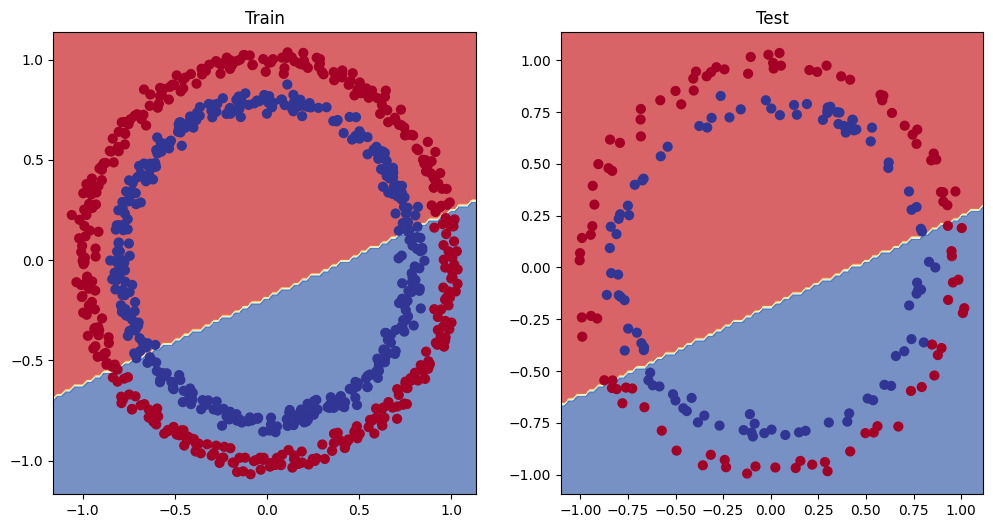

In [16]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

In [45]:

# Build model with non-linear activation function
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # <- add in ReLU activation function
        # Can also put sigmoid in the model 
        # This would mean you don't need to use it on the predictions
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      # Intersperse the ReLU activation function between layers
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [46]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

Training


In [47]:
torch.manual_seed(42)
epochs = 1000

for epoch in range(epochs):
    model_3.train()
    
    y_logit = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logit))
    
    loss = loss_fn(y_logit, y_train)
    acc = accuracy_score(y_train, y_pred)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Testing


In [50]:
model_3.eval()
with torch.inference_mode():
    y_pred = torch.round(torch.sigmoid(model_3(X_test).squeeze()))
 

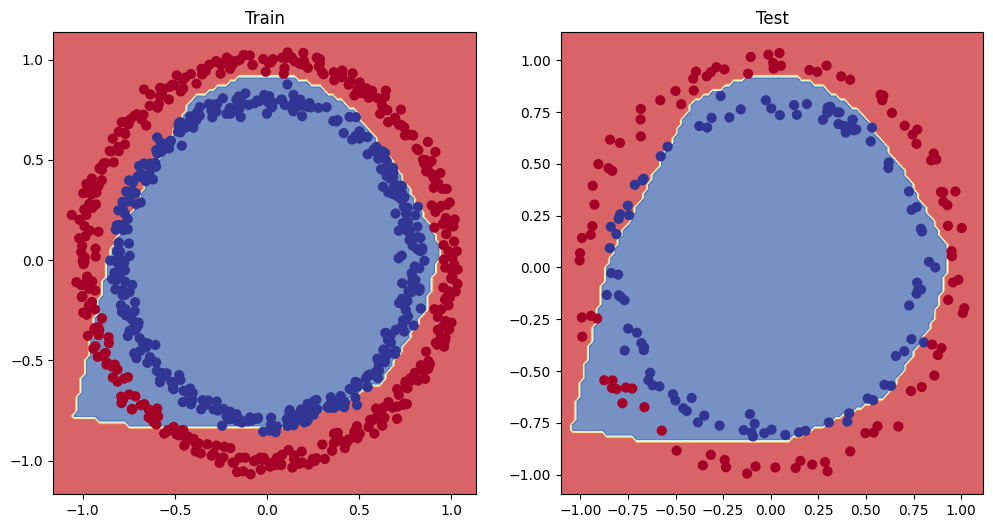

In [51]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity

# Multiclass classification


torch.Size([800, 2])


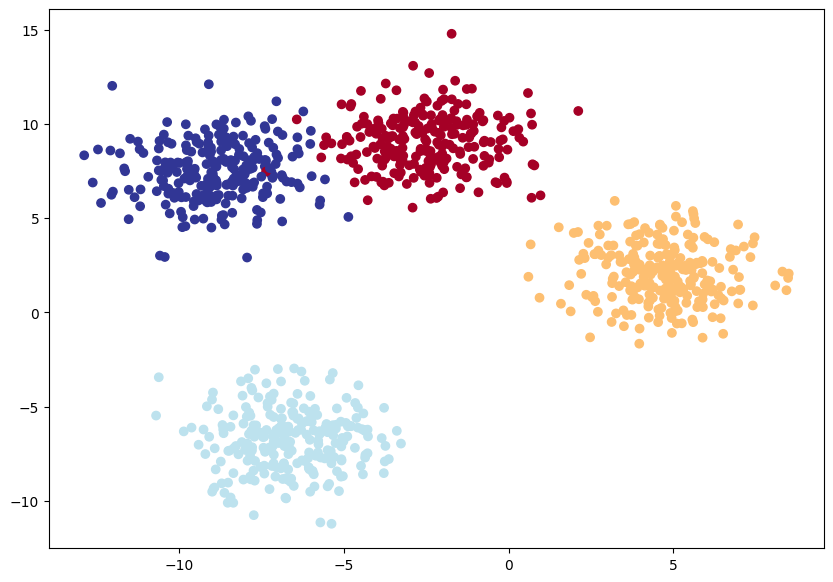

In [55]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels 
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(
    X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

In [ ]:
class BlobModel(nn.Module):
